# Predicting Endometriosis with K-Nearest Neighbors
- KNN implementation for prediction of endometriosis based on a Kaggle dataset (available [here](https://www.kaggle.com/datasets/michaelanietie/endometriosis-dataset/data))
- Exploratory Data Analysis
   - includes visualizations of data relationships through heatmap and scatterplot
   - no correlation apparent
- Data Preparation
   - provides two methods of feature scaling (max-min normalization, standardization)
   - gives formula for best number of nearest neighbors
- K-Nearest Neighbors Algorithm
   - weighted, using Euclidean distance
- Evaluation
   - Dataset not well-suited to machine learning efforts 

In [106]:
import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score, recall_score

endo = pd.read_csv("structured_endometriosis_data.csv")

## Exploratory Data Analysis

### Basic overview of the dataset

In [107]:
endo.shape

(10000, 7)

In [108]:
endo.head()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


In [109]:
endo.tail()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
9995,37,1,3.153169,1,0,18.318849,0
9996,44,0,4.044800,1,1,24.732344,0
9997,39,0,5.096384,1,1,34.204883,1
9998,47,1,7.598862,1,1,30.374964,1
9999,38,0,7.822210,0,0,26.385575,0


In [110]:
endo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Menstrual_Irregularity     10000 non-null  int64  
 2   Chronic_Pain_Level         10000 non-null  float64
 3   Hormone_Level_Abnormality  10000 non-null  int64  
 4   Infertility                10000 non-null  int64  
 5   BMI                        10000 non-null  float64
 6   Diagnosis                  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


In [111]:
endo.describe()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.692300,0.697500,5.030619,0.591100,0.298300,23.052865,0.407900
std,9.205308,0.459364,1.983955,0.491655,0.457535,3.891615,0.491469
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,26.000000,0.000000,3.671697,0.000000,0.000000,20.329327,0.000000
50%,34.000000,1.000000,5.035825,1.000000,0.000000,23.036315,0.000000
75%,42.000000,1.000000,6.396854,1.000000,1.000000,25.712923,1.000000
max,49.000000,1.000000,10.000000,1.000000,1.000000,37.146127,1.000000


### Check for null or duplicated data

In [112]:
endo.isnull().sum()

Age                          0
Menstrual_Irregularity       0
Chronic_Pain_Level           0
Hormone_Level_Abnormality    0
Infertility                  0
BMI                          0
Diagnosis                    0
dtype: int64

In [113]:
endo.duplicated().sum()

0

### Histogram Visualization

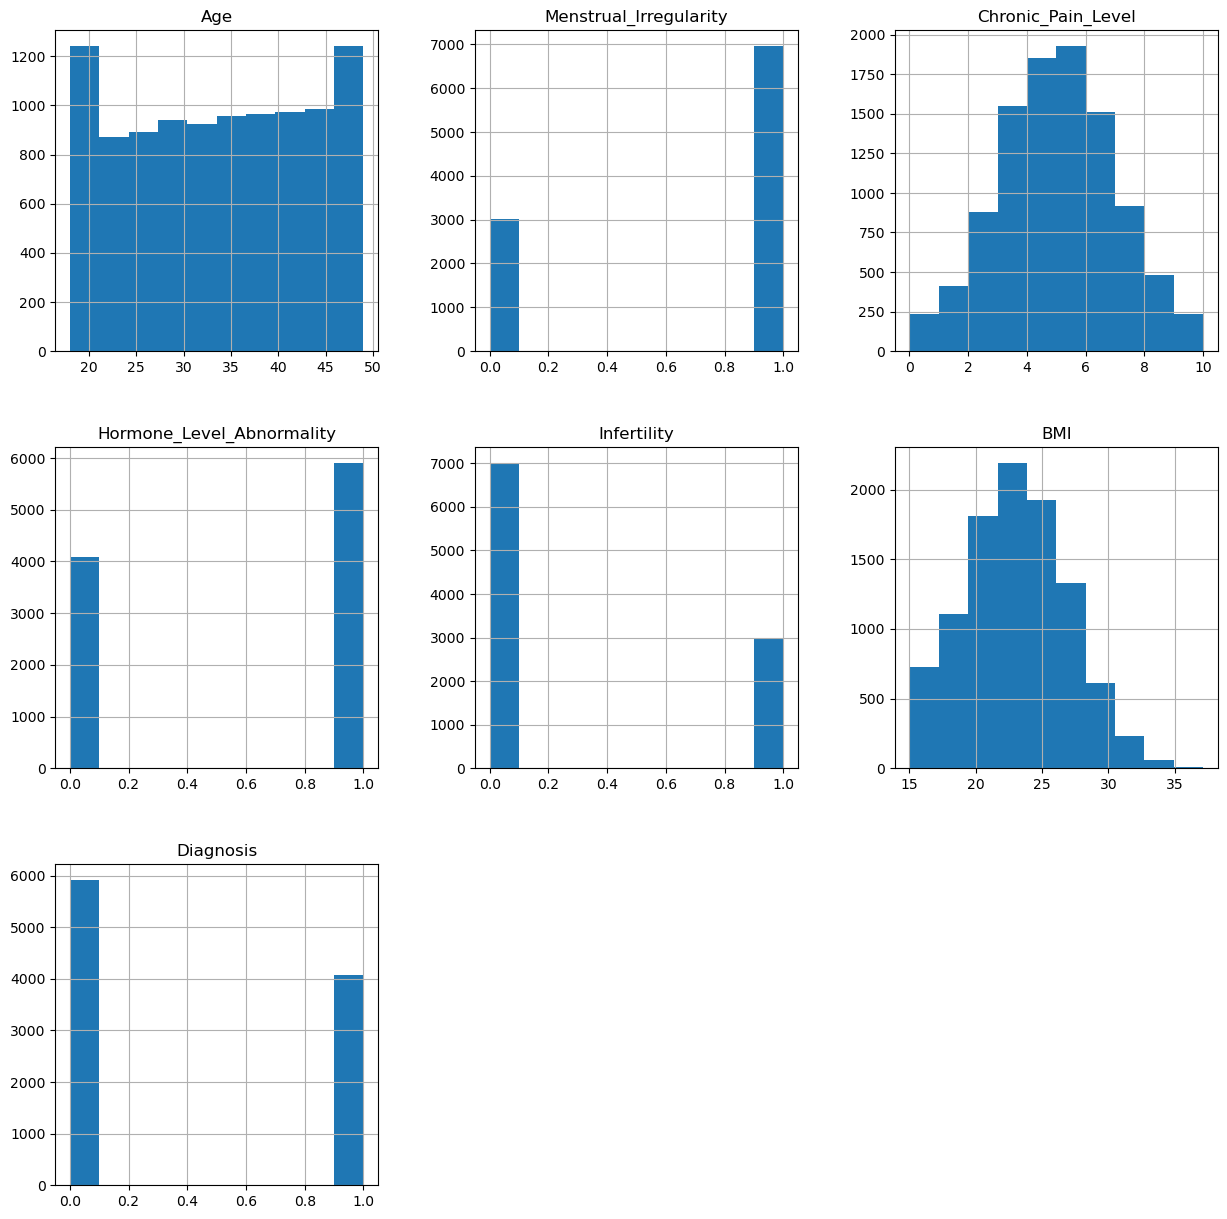

In [114]:
endo.hist(figsize=(15, 15))
plt.show()

### Correlations

In [115]:
endo.corr()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
Age,1.000000,-0.007918,-0.009348,-0.004070,0.014078,-0.011878,-0.011559
Menstrual_Irregularity,-0.007918,1.000000,0.000103,0.014647,-0.012202,0.004868,0.095197
Chronic_Pain_Level,-0.009348,0.000103,1.000000,0.002467,0.009299,0.005755,0.116996
Hormone_Level_Abnormality,-0.004070,0.014647,0.002467,1.000000,0.003890,-0.015499,0.187039
Infertility,0.014078,-0.012202,0.009299,0.003890,1.000000,0.011529,0.096172
BMI,-0.011878,0.004868,0.005755,-0.015499,0.011529,1.000000,0.080310
Diagnosis,-0.011559,0.095197,0.116996,0.187039,0.096172,0.080310,1.000000


In [116]:
endo.corr()["Diagnosis"].sort_values(ascending=False)

Diagnosis                    1.000000
Hormone_Level_Abnormality    0.187039
Chronic_Pain_Level           0.116996
Infertility                  0.096172
Menstrual_Irregularity       0.095197
BMI                          0.080310
Age                         -0.011559
Name: Diagnosis, dtype: float64

### Scatter Plot Matrix Visualization

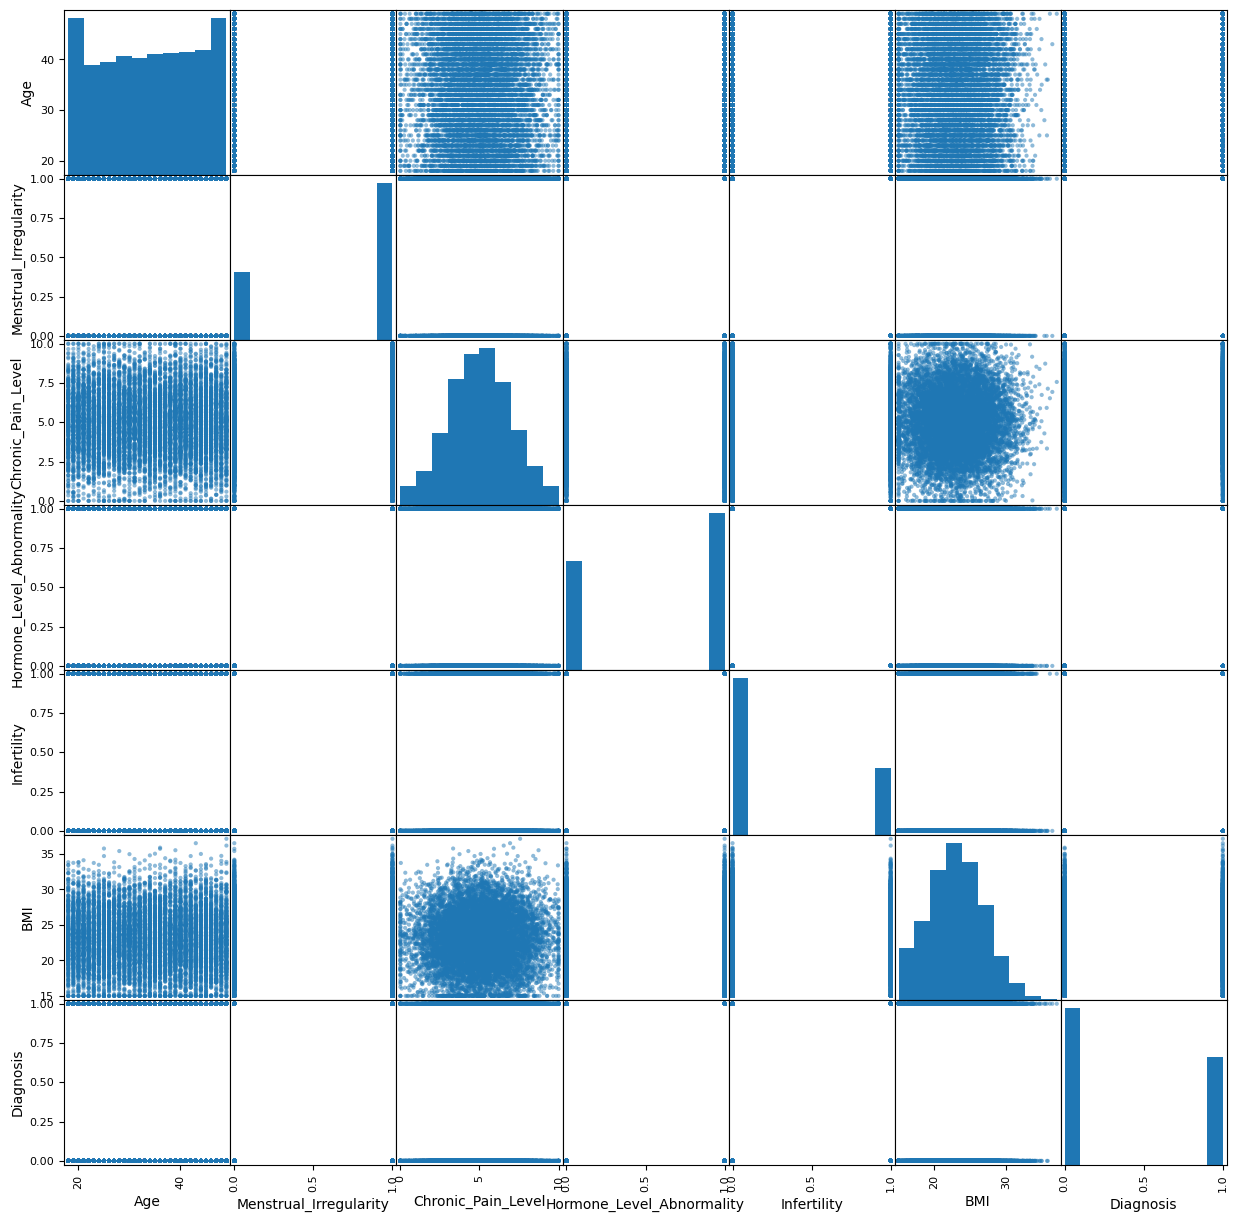

In [117]:
scatter_matrix(endo, figsize=(15,15))
plt.show()

### Heatmap Vizualization

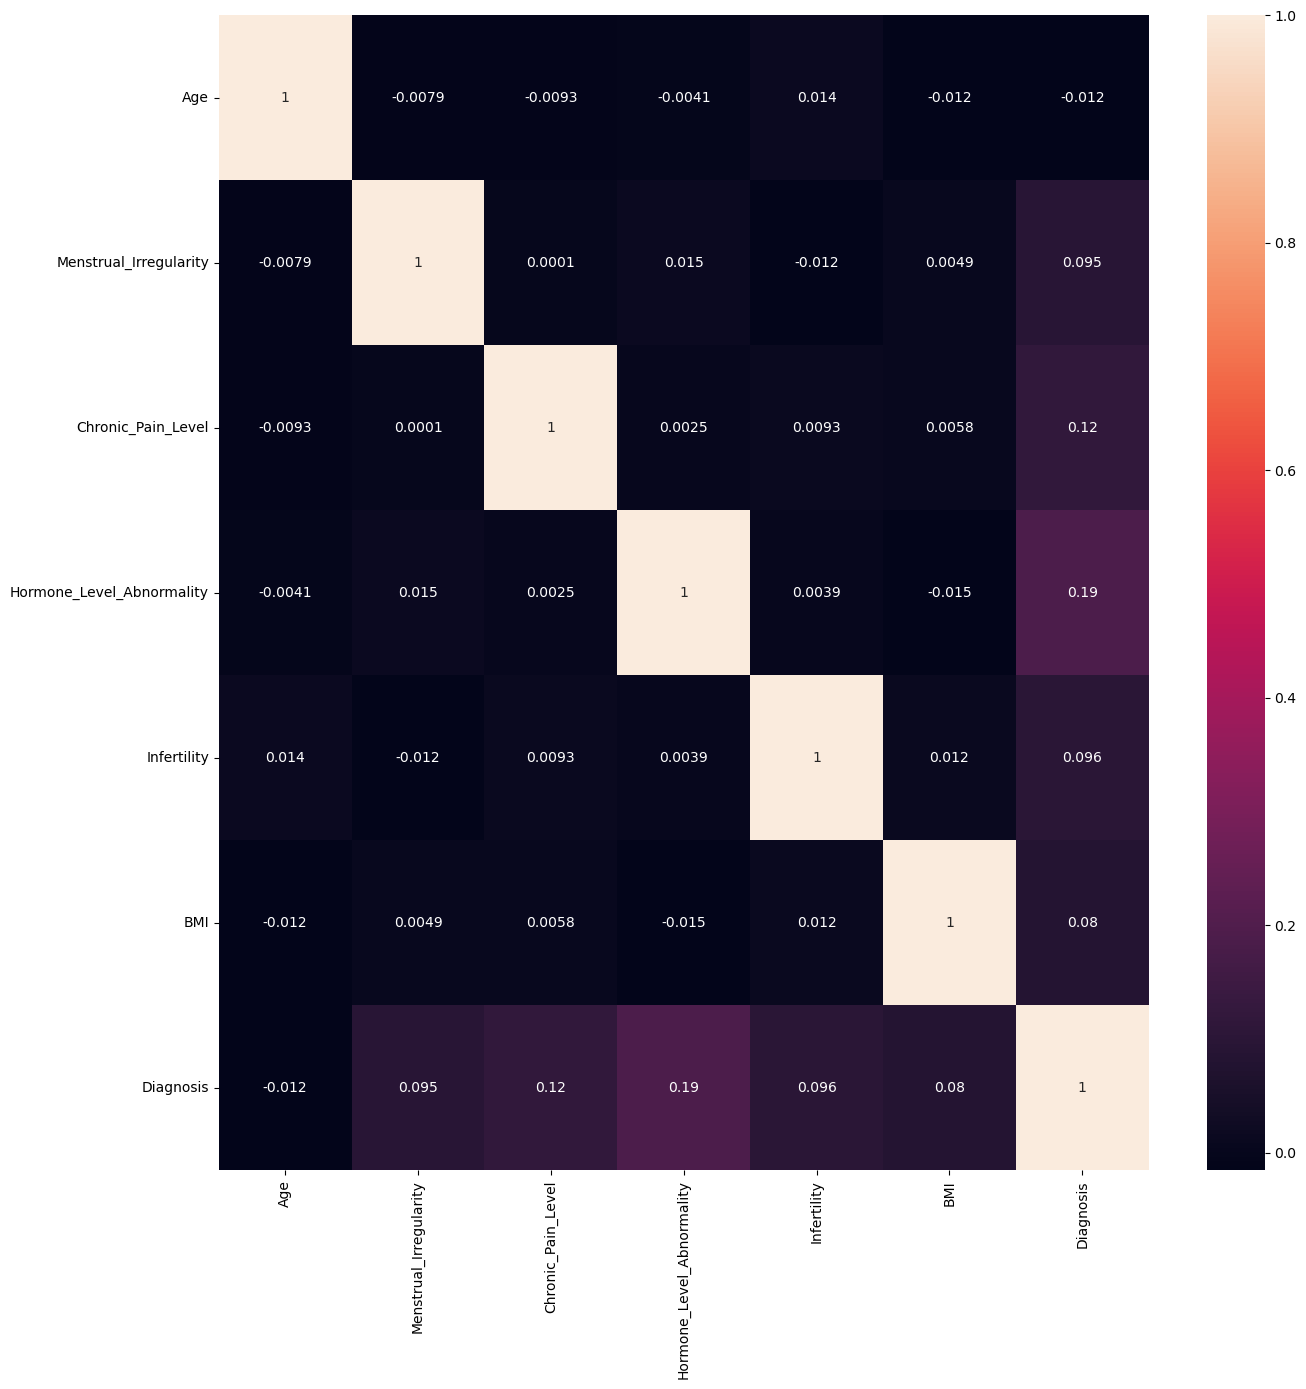

In [118]:
plt.figure(figsize=(15,15))
sns.heatmap(endo[endo.corr().index].corr(), annot=True)
plt.show()

## Preparation for Machine Learning

### Train-Test Split

In [119]:
x = endo.iloc[:, :-1]
y = endo.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

### Feature Scaling

#### Normalization

In [120]:
norm = MinMaxScaler()
n_x_train = norm.fit_transform(x_train)
n_x_test = norm.fit_transform(x_test)

#### Standardization

In [121]:
scale = StandardScaler()
s_x_train = scale.fit_transform(x_train)
s_x_test = scale.transform(x_test)

### Nearest Neighbors Calculation

In [122]:
num_nn = math.floor(math.sqrt(len(y_test)))

## Classification with K-NN

In [123]:
def knn(train_input, test_input):
    classifier = KNeighborsClassifier(n_neighbors = num_nn, weights = 'distance', metric = 'euclidean')
    classifier.fit(train_input, y_train)

    return classifier.predict(test_input)   

In [124]:
n_y_pred = knn(n_x_train, n_x_test)
s_y_pred = knn(s_x_train, s_x_test)

## Evaluation

### Confusion Matrix

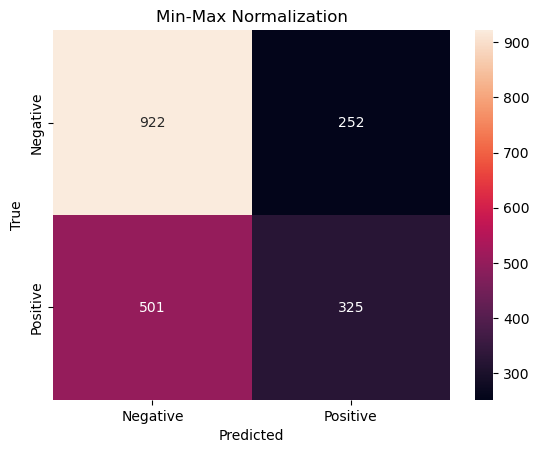

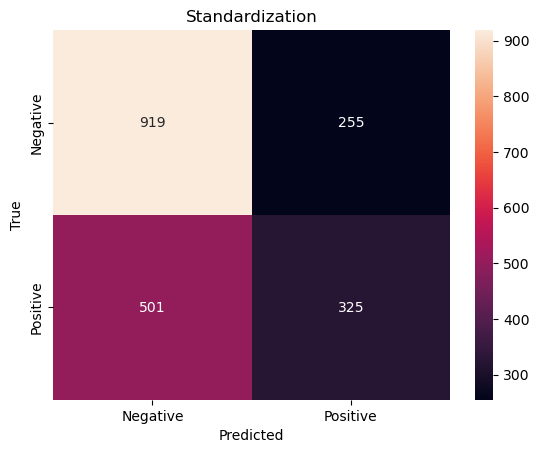

In [125]:
def heat_map(pred, name):
    sns.heatmap(
        confusion_matrix(y_test, pred),
        fmt='d',
        annot=True,
        xticklabels=['Negative', 'Positive'],
        yticklabels=['Negative', 'Positive'])
    plt.title(name)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
heat_map(n_y_pred, "Min-Max Normalization")
heat_map(s_y_pred, "Standardization")

### Accuracy

In [126]:
print(accuracy_score(y_test, n_y_pred))
print(accuracy_score(y_test, s_y_pred))

0.6235
0.622


### Precision

In [127]:
print(precision_score(y_test, n_y_pred))
print(precision_score(y_test, s_y_pred))

0.5632582322357019
0.5603448275862069


### Recall

In [128]:
print(recall_score(y_test, n_y_pred))
print(recall_score(y_test, s_y_pred))

0.3934624697336562
0.3934624697336562


### F1 Score

In [129]:
print(f1_score(y_test, n_y_pred))
print(f1_score(y_test, s_y_pred))

0.4632929436920884
0.4623044096728307
